# _Kapitel 6_

# Signaldarstellung im Zeitbereich 
 
Ein (messtechnisches) Signal ist im mathematischen Sinn eine Funktion einer oder mehrerer unabhängiger Variablen, z.B. der Zeit oder des Ortes. Die Signaldarstellung erfolgt also im Orts- (2D/3D,  Bildverarbeitung) oder Zeitbereich (1D, Signalverarbeitung). 
 
Eine Weiterverarbeitung von Signalen ist nur in zeitdiskreter Darstellung möglich (allein aus Speicherplatzgründen), während die mathematische Darstellung der Signale meist als kontinuierliche Funktion der Zeit erfolgt, z.B. als: 

\begin{equation*}
x( t ) = A  sin(ω_0  t + Φ)
\end{equation*}
 
Diese Funktion beschreibt einen sinusförmigen Signalverlauf mit der Kreisfrequenz ω0 , der Amplitude A und der Phasenverschiebung Φ.   
 
In der Eulerform kann das periodische Signal auch als  
 
\begin{equation*}
x( t ) = A  ej(ω_0  t + Φ) = A cos(ω_0  t + Φ) + j A sin(ω_0  t + Φ) 
\end{equation*}
 
dargestellt werden. Dabei stellt der Cosinusanteil den Realteil, der Sinusanteil den Imaginärteil der Schwingung dar. Die Schwingung kann man sich als Abwicklung der Spitze eines kreisförmig rotierenden komplexen Zeigers vorstellen (Kreisradius A).  
 
Nichtperiodische Signale lassen sich entweder mathematisch oder über ihre stochastischen Eigenschaften beschreiben. Letztere können über Zufallsprozesse modelliert werden (Random Noise). 
 
Die aus der Fehlerrechnung bekannten Lage- und Streumaße dienen zur Beschreibung stochastischer Signale (Mittelwert, Standardabweichung, Wahrscheinlichkeitsdichteverteilungen, Histogramme, ...). 
 
Es gibt viele Algorithmen zur Erzeugung von Zufallszahlen unterschiedlicher Verteilungsfunktionen (Gleich-, Normal-, Poisson-Verteilung, etc.). 

## Spezielle Testsignale 

### Der Einheitspuls: 
Die Bestimmung einer Filterantwort wird erleichtert, wenn zur Anregung des Filters eine möglichst einfache Eingangsfolge x[n] benutzt wird. Diese besteht aus einem einzigen Abtastwert mit dem Wert x[n]=1 zum Zeitpunkt n=0. Alle anderen Abtastwerte für n ≠ 0 seien Null. Eine solche Folge δ[n] wird als Einheitspuls oder auch Einsimpuls zum Zeitpunkt n=0 bezeichnet. Der Einheitspuls wird üblicherweise mit dem Kronecker Delta Symbol δ[n] bezeichnet (Dirac-Funktion). Im kontinuierlichen Fall wird der Einheitspuls durch einen theoretisch unendlich kurzen und unendlich hohen Impuls mit der Impulsfläche Eins modelliert. 
 
### Der Einheitssprung: 
Der Einheitssprung entsteht durch Integration des Einheitspulses. An der Stelle n=0 erfolgt ein Sprung des Signals vom Wert 0 auf den Wert 1 (Integral δ[n] ergibt definitionsgemäß den Wert 1!). 
 
### Das Chirp-Signal: 
Chirp-Signale dienen zum Test der Zeitauflösung von Analysewerkzeugen im Frequenzbereich. Sie synthetisieren ein frequenzmoduliertes (teilweise gleichzeitig auch amplitudenmoduliertes) Testsignal, das als Anregung des Analysefilters benutzt werden kann. Die momentane Frequenz und Amplitude des Signals als Funktion der Zeit sind jeweils bekannt. 

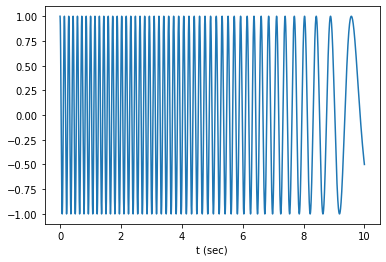

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # print all/none variabels in a single line
from scipy.signal import chirp, spectrogram
import numpy as np
import matplotlib.pyplot as plt

fs = 8000
T = 10
t = np.linspace(0, T, T*fs, endpoint=False)
w = chirp(t, f0=7, f1=0.50, t1=10, method='quadratic')
d1 = plt.plot(t, w)
d2 = plt.xlabel('t (sec)')
plt.show()

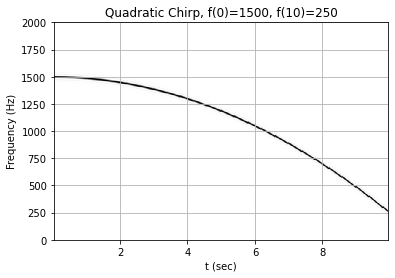

In [2]:
fs = 8000
T = 10
t = np.linspace(0, T, T*fs, endpoint=False)
w = chirp(t, f0=1500, f1=250, t1=10, method='quadratic')
ff, tt, Sxx = spectrogram(w, fs=fs, noverlap=256, nperseg=512, nfft=2048)
d1 = plt.pcolormesh(tt, ff[:513], Sxx[:513], cmap='gray_r')
d2 = plt.title('Quadratic Chirp, f(0)=1500, f(10)=250')
d3 = plt.xlabel('t (sec)')
d4 = plt.ylabel('Frequency (Hz)')
d5 = plt.grid()
plt.show()

### Rauschen: 
Rauschen kann auf dem Rechner leicht durch die Verwendung eines Zufallszahlengenerators simuliert werden. Dieser liefert eine Gleichverteilung, die dem sog. weißen Rauschen entspricht. Durch Filterung kann auch ein normalverteiltes Rauschen (rosa Rauschen) erzeugt werden. 

Text(0, 0.5, 'cnt')

Text(0.5, 0, 'N')

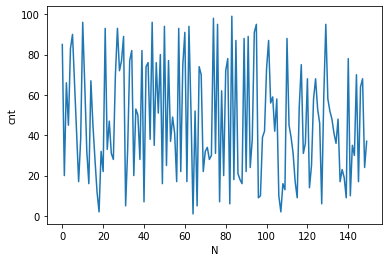

In [3]:
small_counts=np.random.randint(0,100,150)
plt.plot(small_counts)
plt.ylabel('cnt')
plt.xlabel('N')
plt.show()

## Zeitdiskrete Signale als Folgen

Zeitdiskrete Signale werden mathematisch als Folgen von Zahlen dargestellt. Eine Folge von Zahlen x, in welcher die n-te Zahl der Folge als x[n] bezeichnet wird, wird formal als 

\begin{equation*}
x = {x[n]},		 -∞< x < +∞
\end{equation*}

geschrieben, wobei n ganzzahlig ist. In der Praxis ergeben sich derartige Zahlenfolgen durch die periodische Abtastung eines analogen Signals. In diesem Fall ist der Zahlenwert der n-ten Zahl der Folge gleich dem Wert des analogen Signals x(t) zum Zeitpunkt nT, d.h.

\begin{equation*}
x[n] = x( nT ),	 -∞< x < +∞
\end{equation*}

Die Größe T wird als Abtastperiode bezeichnet und ihr Kehrwert als Abtastfrequenz.

### Dirac-Impuls, Einheitspuls in zeitdiskreter Darstellung

<Figure size 288x144 with 0 Axes>

<StemContainer object of 3 artists>

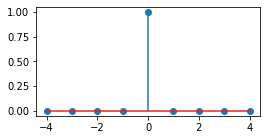

In [4]:
import numpy as np
import matplotlib.pyplot as plt
n=[-4,-3,-2,-1,0,1,2,3,4]
dirac=[0,0,0,0,1,0,0,0,0]
plt.figure(figsize=(4,2))
plt.stem(n,dirac,use_line_collection=True)
plt.show()

### Einheitssprung (step-function) in zeitdiskreter Darstellung
Ab t=0 beginnt der Einheitssprung mit dem Übergang von 0 auf den Wert 1:

<Figure size 288x144 with 0 Axes>

<StemContainer object of 3 artists>

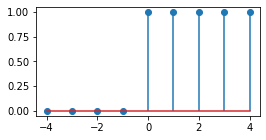

In [5]:
n=[-4,-3,-2,-1,0,1,2,3,4]
step=[0,0,0,0,1,1,1,1,1]
plt.figure(figsize=(4,2))
plt.stem(n,step,use_line_collection=True)
plt.show()

### Sinusförmige Anregung

<Figure size 288x144 with 0 Axes>

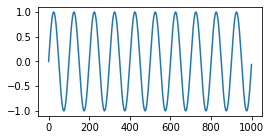

In [6]:
import math
m=1000        # Anzahl samples
f=10          # Frequenz
y=[math.sin(2*math.pi*f*x/m) for x in range(m)]
plt.figure(figsize=(4,2))
plt.plot(y)
plt.show()

### Sinus + Rauschen (normalverteilt)

<Figure size 288x144 with 0 Axes>

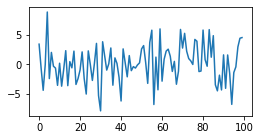

In [7]:
import random
m=100        # Anzahl samples
f=3          # Frequenz
y=[math.sin(2*math.pi*f*x/m)+random.gauss(0,3) for x in range(m)]
plt.figure(figsize=(4,2))
plt.plot(y)
plt.show()

### Zeitdiskrete Systeme

Ein zeitdiskretes System ist mathematisch als eine Transformation oder als Operator definiert. Dabei wird eine Eingangsfolge x[n] in eine Ausgangsfolge y[n] abgebildet:

\begin{equation*}
y[n] = T(x[n])
\end{equation*}


### Das ideale Verzögerungssystem

Ein ideales Verzögerungssystem wird durch die Gleichung

\begin{equation*}
y[n] = x[n-nd], 	 -∞< n < +∞
\end{equation*}

beschrieben, wobei nd eine feste, positive ganze Zahl ist, die als Verzögerung des Systems bezeichnet wird. Das Verzögerungssystem verschiebt die Eingangsfolge um nd Abtastperioden nach rechts, um die Ausgangsfolge zu bilden.


### Lineare und nichtlineare Systeme

Für die Klasse der linearen Systeme gilt das Superpositionsprinzip:

\begin{equation*}
T (x1[n] + x2[n]) = T(x1[n]) + T(x2[n]) = y1[n] + y2[n]
\end{equation*}

und

\begin{equation*}
T(ax[n]) = aT{x[n]} = ay[n]
\end{equation*}

wobei a eine beliebige Konstante ist.

Ein nichtlineares System stellt z.B.

\begin{equation*}
w[n] = log10(|x[n]|)
\end{equation*}

dar.
 


### Zeitinvariante Systeme

Ein zeitinvariantes System (oder auch verschiebungsinvariantes System) ruft bei der Zeitverschiebung einer Eingangsfolge eine entsprechende Zeitverschiebung der Ausgangsfolge hervor. 

Definition: Ein System heißt zeitinvariant (time invariant), wenn aus der Eingangsfolge x1[n] = x[n-n0] für alle n0 die Ausgangsfolge y1 = y[n-n0] erzeugt wird.


### LTI-Systeme

Lineare und gleichzeitig zeitinvariante Systeme werden als LTI-Systeme bezeichnet (LTI = linear time invariant). Die abgetastete Folge x[k] wird mit dem Operator T beaufschlagt:

\begin{equation*}
y[n] = T \left( \sum_{k=-\infty}^\infty x[k] \delta[n-k]\right)
\end{equation*}

Ausgehend vom Superpositionsprinzip können wir schreiben:

\begin{equation*}
y[n] = \sum_{k=-\infty}^\infty x[k] T(\delta[n-k]) = \sum_{k=-\infty}^\infty x[k] h_k[n]
\end{equation*}

Die Eigenschaft der Zeitinvarianz beinhaltet, dass, wenn h[n] die Antwort auf δ[n] ist, dann ist h[n-k] die Antwort auf δ[n-k]. Damit entsteht

\begin{equation*}
y[n] = \sum_{k=-\infty}^\infty x[k] h[n-k]
\end{equation*}

Als Konsequenz ergibt sich, dass ein LTI-System vollständig durch seine Impulsantwort h[n] beschrieben wird. Diese Operation wird als Faltung bezeichnet und durch den Operator * angedeutet: 

\begin{equation*}
y[n] = x[n]*h[n].
\end{equation*}

### Kausalität

Ein System ist kausal, wenn für beliebige n0 der Wert der Ausgangsfolge zum Zeitpunkt n=n0 nur von den Werten der Eingangsfolge im Bereich n<=n0 abhängt. Das System heißt dann nicht vorhersagend.

Das Vorwärts-Differenz-System  y[n] = x[n+1] – x[n] ist daher nicht kausal, das entsprechende Rückwärts-Differenz-System 
y[n] = x[n] – x[n-1] dagegen schon, da es sich nur auf vergangene Werte bezieht.
 
### Anwendung des Superpositionsprinzips auf LTI-System



#### Eingangsfolge x:

<Figure size 288x144 with 0 Axes>

<StemContainer object of 3 artists>

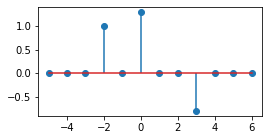

In [8]:
n=[-5,-4,-3,-2,-1,0,1,2,3,4,5,6]
x=[0,0,0,1,0,1.3,0,0,-0.8,0,0,0]
plt.figure(figsize=(4,2))
plt.stem(n,x,use_line_collection=True)

#### Impulsantwort h:

<Figure size 288x144 with 0 Axes>

<StemContainer object of 3 artists>

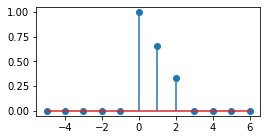

In [9]:
h=[0,0,0,0,0,1,0.66,0.33,0,0,0,0]
plt.figure(figsize=(4,2))
plt.stem(n,h,use_line_collection=True)

#### Ergebnis der Faltung y=x*h:

<Figure size 288x144 with 0 Axes>

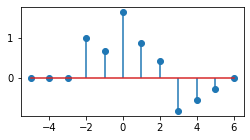

In [10]:
y=np.convolve(x, h, 'same')
plt.figure(figsize=(4,2))
d1 = plt.stem(n,y,use_line_collection=True)
plt.show()

### Anwendung des Superpositionsprinzips auf LTI-System

<Figure size 648x504 with 0 Axes>

<StemContainer object of 3 artists>

<StemContainer object of 3 artists>

<StemContainer object of 3 artists>

<StemContainer object of 3 artists>

<StemContainer object of 3 artists>

<StemContainer object of 3 artists>

<StemContainer object of 3 artists>

<StemContainer object of 3 artists>

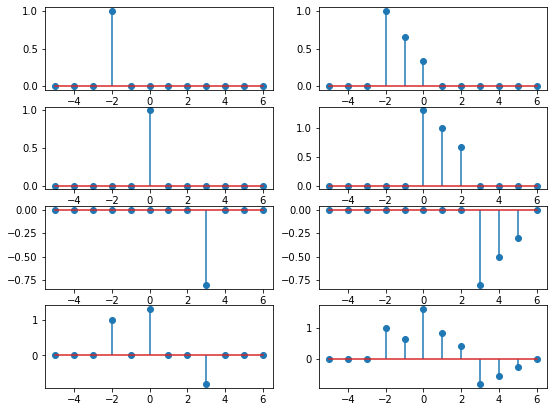

In [11]:
plt.figure(figsize=(9,7))
plt.subplot(421)
x1=[0,0,0,1,0,0,0,0,0,0,0,0]
plt.stem(n,x1,use_line_collection=True)
plt.subplot(422)
h1=[0,0,0,1,0.66,0.33,0,0,0,0,0,0]
plt.stem(n,h1,use_line_collection=True)

plt.subplot(423)
x2=[0,0,0,0,0,1,0,0,0,0,0,0]
plt.stem(n,x2,use_line_collection=True)
plt.subplot(424)
h2=[0,0,0,0,0,1.3,1,0.66,0,0,0,0]
plt.stem(n,h2,use_line_collection=True)

plt.subplot(425)
x3=[0,0,0,0,0,0,0,0,-0.8,0,0,0]
plt.stem(n,x3,use_line_collection=True)
plt.subplot(426)
h3=[0,0,0,0,0,0,0,0,-0.8,-0.5,-0.3,0]
plt.stem(n,h3,use_line_collection=True)

plt.subplot(427)
plt.stem(n,x,use_line_collection=True)
plt.subplot(428)
plt.stem(n,y,use_line_collection=True)

### Aufgaben der Filterung von Signalen
Für die Signalfilterung gibt es eine Reihe von Gründen, z.B.:
* Rauschunterdrückung: Ändert sich eine von einem Sensor erfasste Messgröße nur langsam im Verhältnis zur Signalbandbreite des Sensors und ist das Rauschen über die Signalbandbreite gleichverteilt, so kann ein Tiefpassfilter das Messrauschen erheblich mindern.
* Verstärkung relevanter Signalanteile: In der Sprachsignalverarbeitung steigt die Erkennungsrate von Spracherkennungssystemen z.B. durch Bandpassfilterung des Eingangssignals (Begrenzung auf relevante Frequenzbereiche von 200...5000Hz).
* Frequenzgangkorrektur: Bei Konzerten werden Einflüsse der Raumakustik durch Filterbänke vor dem Verstärker mit einem sog. Equalizer korrigiert. Allpassfilter werden verwendet, um Phasenunterschiede zwischen Signalen u vermindern, die z.B. aus der Aufstellposition der Lautsprecher resultieren.

Der Entwurf digitaler Filter erfordert fundierte Kenntnisse in Bereichen der z-Transformation (diskrete Form der Laplace-Transformation), der Polynomapproximation, der Bilineartransformation und der Fouriertransformation.

Die Beschreibung der Wirkung eines Filters ist dagegen relativ einfach. Diese kann im Zeit- und Frequenzbereich erfolgen (Impulsantwort oder Übertragungsfunktion)
### Filterung im Zeitbereich
Ein diskretes digitales Filter modifiziert eine Eingangsfolge zeitdiskreter Abtastwerte eines Signals und erzeugt eine diskrete Ausgangsfolge. Bei den meisten Digitalfiltern ist dies eine lineare Transformation.
### Eigenschaften digitaler Filter
Eine Abbildung der Form

\begin{equation*}
y[n] = 1/3 (x[n] + x[n+1] + x[n+2])
\end{equation*}

stellt ein digitales Filter mit folgenden Eigenschaften dar:
* Über jeweils drei Abtastwerte der Eingangsfolge x[n] wird gleitend gemittelt
* Die Gleichung für y[n] wird Differenzengleichung des Filters genannt (auch wenn bei diesem einfachen Beispiel keine Differenz vorhanden ist)
* Bei dem Filter handelt es sich um ein sogenanntes Finite-Impulse-Response-Filter (kurz FIR-Filter), das bedeutet, dass auf ein zeitlich begrenztes Eingangssignal (z.B. Einheitspuls) ein ebenfalls zeitlich begrenztes Ausgangssignal erzeugt wird.
* Der Index n stellt den augenblicklichen Zeitpunkt dar. Je nach Wahl der Indizierung werden für die Berechnung des Ausgangssignals also nur vergangene (kausales Filter) oder auch zukünftige (nichtkausales Filter) Werte des Eingangssignals einbezogen.
Bei Echtzeitverarbeitung können nur kausale Filter realisiert werden. Die Indizierung des Mittelwertfilters wird dazu verändert:

\begin{equation*}
y[n] = 1/3 (x[n] + x[n-1] + x[n-2])
\end{equation*}

Kausale Filter verursachen immer eine zeitliche Verschiebung zwischen Ein- und Ausgangssignal (Phasenverschiebung). Dies entspricht auch dem Verhalten analoger Filter. Erfolgt die Verarbeitung nicht in Echtzeit, so können auch nichtkausale Filtertypen ohne Phasenverschiebung verwendet werden. Damit wird der Vergleich zwischen Ein- und Ausgangssignal vereinfacht.

Die Differenzengleichung eine FIR-Filters lässt sich allgemein angeben als:

\begin{equation*}
y[n] =  \sum_{k=0}^M b_k x[n-k].
\end{equation*}

Für kausale Filter ist $M=2$ und alle $b_k=1/3$, für $k=0,1,2$ zu setzen

## Realisierung von FIR-Filtern

Die Beschreibung eines digitalen Filters in Form der Differenzengleichung kann direkt in eine Darstellung als Blockschaltbild umgesetzt werden. Der Zugriff auf vergangene Abtastwerte wird durch Verzögerungseinheiten realisiert. Eine Verzögerungseinheit (Blöcke mit der Bezeichnung z^-1) speichert den jeweils letzten Abtastwert und gibt diesen am Ausgang um eine Abtastzeit später wieder aus.  

### Filterantwort auf Einheitspuls (Impulsantwort)

Die Bestimmung der Filterantwort ist am einfachsten, wenn als Anregung eine möglichst simple Eingangsfolge benutzt wird, z.B. der Einheitspuls. Dann lässt sich aus dem Blcokschaltbild die Impulsantwort ableiten



<Figure size 288x144 with 0 Axes>

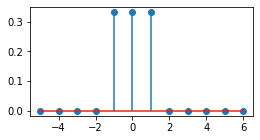

In [12]:
n=[-5,-4,-3,-2,-1,0,1,2,3,4,5,6]
x1=[0,0,0,0,0,0,1,0,0,0,0,0]
h1=[0,0,0,0.333,0.333,0.333,0,0,0,0,0,0]
y=np.convolve(x1, h1, 'same')
plt.figure(figsize=(4,2))
d1 = plt.stem(n,y,use_line_collection=True)
plt.show()

Wird ein FIR-Filter mit dem Einheitsuls angeregt, so besteht die Impulsantwort aus den Filterkoeffizienten des Filters. Ist also die Impulsantwort eines beliebigen Filters bekannt (und zeitlich begrenzt), so lässt sich leicht ein FIR-Filter mit identischem Verhalten nachbilden (-> 
Filterdesign).
Die notwendige Struktur besteht aus Verzögerungselementen, Multiplikationen und Additionen.


<Figure size 720x288 with 0 Axes>

Text(0.5, 1.0, 'Sinus+Rauschen')

<Figure size 720x288 with 0 Axes>

Text(0.5, 1.0, 'gefiltert')

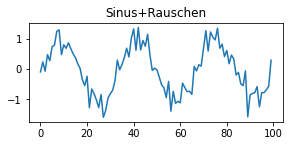

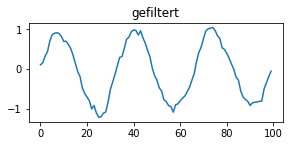

In [18]:
import math
import random
m=100        # Anzahl samples
f=3          # Frequenz
y=[math.sin(2*math.pi*f*x/m)+random.gauss(0,.3) for x in range(m)]
h1=[0,0,0.2,0.2,0.2,0.2,0.2,0,0,0,0,0] # Impulsantwort eines gleitenden Mittelwertfilters mit Mittelung über 5 Abtastwerte
plt.figure(figsize=(10,4))
plt.subplot(221)
plt.title('Sinus+Rauschen')
plt.plot(y)

y=np.convolve(y,h1,'same')
plt.figure(figsize=(10,4))
plt.subplot(222)
plt.title('gefiltert')
plt.plot(y)
plt.show()


### Bestimmung des Frequenzgangs durch Fouriertransformation der Filterimpulsantwort
Transformiert man eine Impulsantwort eines Filters in den Frequenzbereich und bildet das Betragsspektrum, so erhält man die Übertragungsfunktion des Filters.
Für unser Mittelwertfilter ergibt sich ein Tiefpassverhalten. 

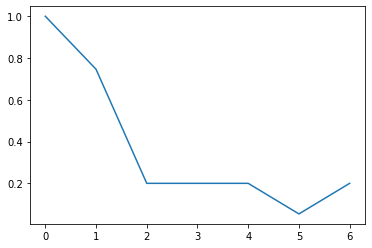

In [19]:
f=np.fft.rfft(h1) # Fouriertransformation eines reellen Eingangssignals -> komplexes Ausgangssignal
f=abs(f)          # Betragsbildung liefert sqrt(re*re+im*im) -> reelles Amplitudenspektrum
plt.plot(f)